In [56]:
import pandas as pd
df=pd.read_csv('/content/RFM data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [57]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


In [58]:
df.dropna(inplace=True)

In [59]:
df.duplicated().sum()

np.int64(5182)

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
#(b)finding Recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convert 'InvoiceDate' to datetime
current_date=df['InvoiceDate'].max()
recency_data=df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
print(recency_data.head())
recency_data['Recency']=(current_date-recency_data['InvoiceDate']).dt.days
print(recency_data[['CustomerID','Recency']].head(10))

   CustomerID         InvoiceDate
0     12347.0 2011-12-07 15:52:00
1     12348.0 2011-09-25 13:13:00
2     12349.0 2011-11-21 09:51:00
3     12350.0 2011-02-02 16:01:00
4     12352.0 2011-11-03 14:37:00
   CustomerID  Recency
0     12347.0        1
1     12348.0       74
2     12349.0       18
3     12350.0      309
4     12352.0       35
5     12353.0      203
6     12354.0      231
7     12355.0      213
8     12356.0       22
9     12357.0       32


In [62]:
#(b)finding frequency
frequency_data=df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()#grouping based on invoice nunique is used to count the unique values
frequency_data.columns=['CustomerID','Frequency']
print(frequency_data)

      CustomerID  Frequency
0        12347.0          7
1        12348.0          4
2        12349.0          1
3        12350.0          1
4        12352.0          7
...          ...        ...
4293     18280.0          1
4294     18281.0          1
4295     18282.0          2
4296     18283.0         16
4297     18287.0          3

[4298 rows x 2 columns]


In [63]:
#(c)monetary
df['TotalPrice']=df['Quantity']*df['UnitPrice']
monetary_data=df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_data.columns=['CustomerID','Monetary']
print(monetary_data.head(10))

   CustomerID  Monetary
0     12347.0   4060.40
1     12348.0   1437.24
2     12349.0   1417.60
3     12350.0    294.40
4     12352.0   1385.74
5     12353.0     89.00
6     12354.0   1079.40
7     12355.0    459.40
8     12356.0   2487.43
9     12357.0   6182.67


In [64]:
df1=pd.merge(recency_data,frequency_data,on='CustomerID')
df2=pd.merge(monetary_data,df1,on='CustomerID')
df2.head()

,CustomerID,Monetary,InvoiceDate,Recency,Frequency
0,12347.0,4060.40,2011-12-07 15:52:00,1,7
1,12348.0,1437.24,2011-09-25 13:13:00,74,4
2,12349.0,1417.60,2011-11-21 09:51:00,18,1
3,12350.0,294.40,2011-02-02 16:01:00,309,1
4,12352.0,1385.74,2011-11-03 14:37:00,35,7


In [65]:
df3=df2.drop('InvoiceDate',axis=1)

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wss=[]
for i in range(2,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(df3)
  wss.append(model.inertia_)

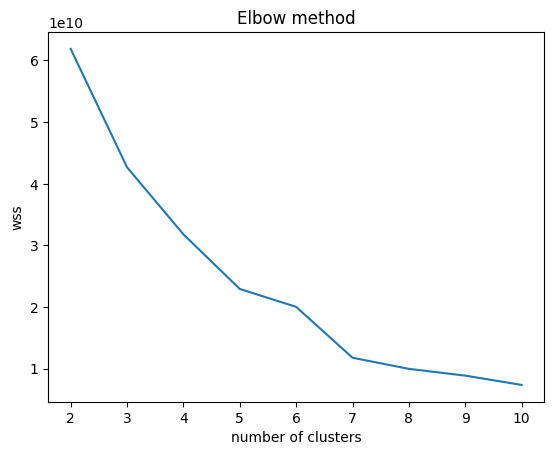

In [67]:
plt.plot(range(2,11),wss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wss')
plt.show()

In [68]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(df3)
df3['cluster']=kmeans.labels_
for I in range(0,5):

  cluster_data=df3[df3['cluster']==I]

  print(f'cluster no{I}:\n{cluster_data}\n')

cluster no0:
      CustomerID  Monetary  Recency  Frequency  cluster
0        12347.0   4060.40        1          7        0
1        12348.0   1437.24       74          4        0
2        12349.0   1417.60       18          1        0
3        12350.0    294.40      309          1        0
4        12352.0   1385.74       35          7        0
...          ...       ...      ...        ...      ...
4293     18280.0    180.60      277          1        0
4294     18281.0     80.82      180          1        0
4295     18282.0    178.05        7          2        0
4296     18283.0   2039.58        3         16        0
4297     18287.0   1837.28       42          3        0

[4284 rows x 5 columns]

cluster no1:
      CustomerID   Monetary  Recency  Frequency  cluster
54       12415.0   81455.09       24         16        1
558      13089.0   56555.07        2         90        1
988      13694.0   44966.65        3         48        1
1276     14088.0   49510.21        9         13 

In [69]:
silhouette_avg = silhouette_score(df3,df3['cluster'])
print(silhouette_avg)

0.9539561009232069


In [70]:
#Scale for recency
def recency_score(days):
    if days <= 30:
        return 5
    elif days <= 60:
        return 4
    elif days <= 90:
        return 3
    elif days <= 180:
        return 2
    elif days <= 365:
        return 1
    else:
        return 1  # Customers inactive >1 year can scored 1


In [71]:
df2['R_Score'] = df2['Recency'].apply(recency_score)


In [72]:
df2.head()

,CustomerID,Monetary,InvoiceDate,Recency,Frequency,R_Score
0,12347.0,4060.40,2011-12-07 15:52:00,1,7,5
1,12348.0,1437.24,2011-09-25 13:13:00,74,4,3
2,12349.0,1417.60,2011-11-21 09:51:00,18,1,5
3,12350.0,294.40,2011-02-02 16:01:00,309,1,1
4,12352.0,1385.74,2011-11-03 14:37:00,35,7,4


In [78]:
def frequency_score(freq):
    if freq <= 1:
        return 1
    elif freq <= 3:
        return 2
    elif freq <= 6:
        return 3
    elif freq <= 10:
        return 4
    else:
        return 5

In [79]:
df2['F_Score'] = df2['Frequency'].apply(frequency_score)
df2.head()

,CustomerID,Monetary,InvoiceDate,Recency,Frequency,R_Score,F_Score
0,12347.0,4060.40,2011-12-07 15:52:00,1,7,5,4
1,12348.0,1437.24,2011-09-25 13:13:00,74,4,3,3
2,12349.0,1417.60,2011-11-21 09:51:00,18,1,5,1
3,12350.0,294.40,2011-02-02 16:01:00,309,1,1,1
4,12352.0,1385.74,2011-11-03 14:37:00,35,7,4,4


In [80]:
def monetary_score(amount):
    if amount <= 100:
        return 1
    elif amount <= 500:
        return 2
    elif amount <= 1000:
        return 3
    elif amount <= 2000:
        return 4
    else:
        return 5

In [81]:
df2['M_Score'] = df2['Monetary'].apply(monetary_score)
df2.head()

,CustomerID,Monetary,InvoiceDate,Recency,Frequency,R_Score,F_Score,M_Score
0,12347.0,4060.40,2011-12-07 15:52:00,1,7,5,4,5
1,12348.0,1437.24,2011-09-25 13:13:00,74,4,3,3,4
2,12349.0,1417.60,2011-11-21 09:51:00,18,1,5,1,4
3,12350.0,294.40,2011-02-02 16:01:00,309,1,1,1,2
4,12352.0,1385.74,2011-11-03 14:37:00,35,7,4,4,4


In [82]:
# b) Segment the customers based on their RFM scores using the dataset?

def assign_segment(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']

    if R >= 4 and F >= 4 and M >= 4:
        return 'Champions'
    elif 3 <= R <= 5 and 3 <= F <= 5 and 3 <= M <= 5:
        return 'Loyal customers'
    elif R >= 4 and 2 <= F <= 3 and 2 <= M <= 3:
        return 'Potential loyalist'
    elif R >= 4 and F <= 2 and M <= 2:
        return 'Recent customers'
    elif R >= 4 and F <= 2 and M <= 2:
        return 'Promising'
    elif 3 <= R <= 5 and 3 <= F <= 5 and 3 <= M <= 5:
        return 'Needs attention'
    elif R <= 2 and F <= 2 and M <= 2:
        return 'About to sleep'
    elif 2 <= R <= 5 and F <= 3 and M <= 3:
        return 'At risk'
    elif R <= 3 and F >= 4 and M >= 4:
        return "Can't lose them"
    elif R <= 2 and F <= 2 and M <= 2:
        return 'Hibernating'
    else:
        return 'Others'

In [83]:
df2

,CustomerID,Monetary,InvoiceDate,Recency,Frequency,R_Score,F_Score,M_Score
0,12347.0,4060.40,2011-12-07 15:52:00,1,7,5,4,5
1,12348.0,1437.24,2011-09-25 13:13:00,74,4,3,3,4
2,12349.0,1417.60,2011-11-21 09:51:00,18,1,5,1,4
3,12350.0,294.40,2011-02-02 16:01:00,309,1,1,1,2
4,12352.0,1385.74,2011-11-03 14:37:00,35,7,4,4,4
...,...,...,...,...,...,...,...,...
4293,18280.0,180.60,2011-03-07 09:52:00,277,1,1,1,2
4294,18281.0,80.82,2011-06-12 10:53:00,180,1,2,1,1
4295,18282.0,178.05,2011-12-02 11:43:00,7,2,5,2,2
4296,18283.0,2039.58,2011-12-06 12:02:00,3,16,5,5,5


In [84]:
df2['Segment'] = df2.apply(assign_segment, axis=1)

df2.head()

,CustomerID,Monetary,InvoiceDate,Recency,Frequency,R_Score,F_Score,M_Score,Segment
0,12347.0,4060.40,2011-12-07 15:52:00,1,7,5,4,5,Champions
1,12348.0,1437.24,2011-09-25 13:13:00,74,4,3,3,4,Loyal customers
2,12349.0,1417.60,2011-11-21 09:51:00,18,1,5,1,4,Others
3,12350.0,294.40,2011-02-02 16:01:00,309,1,1,1,2,About to sleep
4,12352.0,1385.74,2011-11-03 14:37:00,35,7,4,4,4,Champions


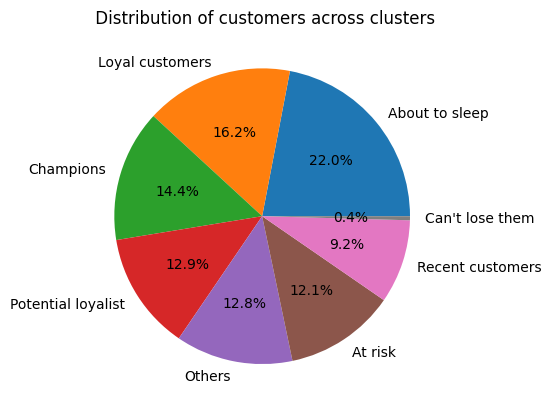

In [85]:
#Q.10(a)
plt.pie(df2['Segment'].value_counts(),labels=df2['Segment'].value_counts().index,autopct="%1.1f%%")
plt.title(' Distribution of customers across clusters')
plt.show()

<ipython-input-86-ab3cb6574cda>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='Segment', y='Count', palette='Set3')


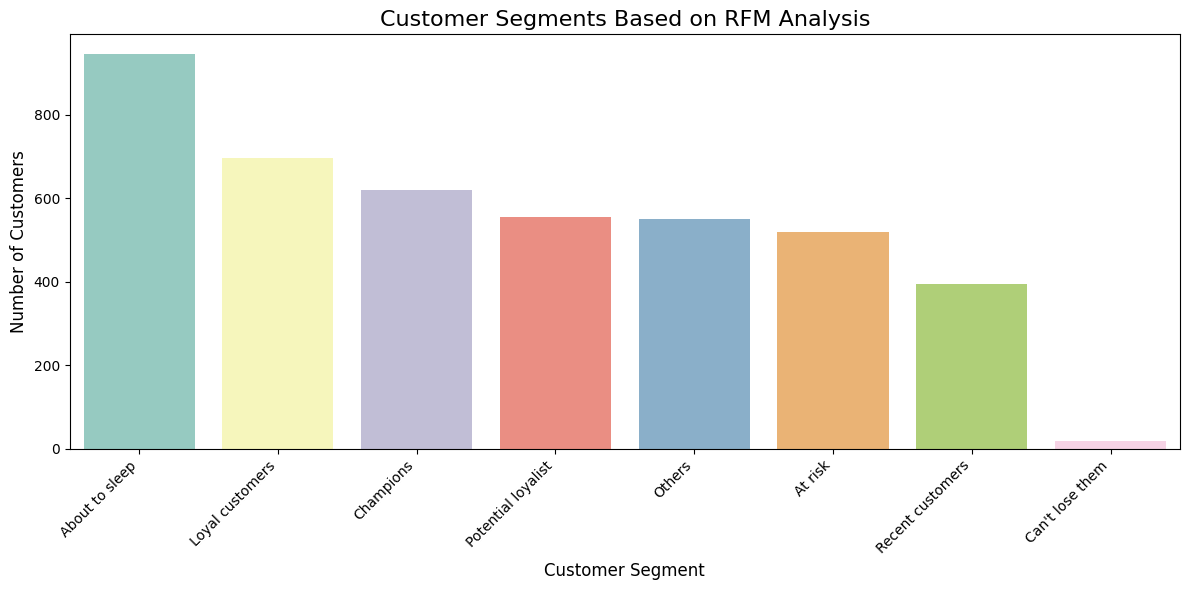

In [86]:

# Assuming your DataFrame is named 'rfm' and contains a 'Segment' column
segment_counts = df2['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Set the plot size and style
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_counts, x='Segment', y='Count', palette='Set3')


# Customize plot
plt.title('Customer Segments Based on RFM Analysis', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()